<h3>Estágio em Dados - Itaú Unibanco - Desafio
<h3>
Código desenvolvido por : Lucca Machado da Silva    

In [948]:
#Utilizando a biblioteca pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning, DeprecationWarning))

In [949]:
#Carregando o arquivo CSV para um DataFrame
df = pd.read_csv('Ecommerce_DBS.csv')

In [950]:
#Verificando os dados inicais do DataFrame
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source,Country,State,Latitude,Longituide
0,46251,08/09/2020,Electronics,12,3,740,7,20,Male,Instagram Campign,Canada,Alberta,55.000000,-115.000000
1,46251,05/03/2022,Home,468,4,2739,8,20,Male,Instagram Campign,Canada,Ontario,50.000000,-85.000000
2,46251,23/05/2022,Home,288,2,3196,10,20,Male,SEM,United States,New Mexico,34.840515,-106.248482
3,46251,12/11/2020,Clothing,196,1,3509,3,20,Male,Instagram Campign,Canada,Saskatchewan,55.000000,-106.000000
4,13593,27/11/2020,Home,449,1,3452,3,20,Female,Instagram Campign,United States,California,36.116203,-119.681564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33308,10/08/2023,Clothing,279,2,2187,1,55,Male,SEM,United States,Indiana,39.849426,-86.258278
249996,48835,23/11/2021,Home,27,1,3615,1,42,Female,Instagram Campign,Canada,Quebec,53.000000,-70.000000
249997,21019,02/07/2020,Home,17,5,2466,0,41,Male,Instagram Campign,United States,Indiana,39.849426,-86.258278
249998,49234,30/12/2020,Books,398,2,3668,8,34,Female,Instagram Campign,Canada,New Brunswick,46.498390,-66.159668


In [951]:
#Obtendo informações gerais sobre o conjunto de dados, através disso é possível verificar que não temos missing values
#e os tipos dos dados de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   NPS                    250000 non-null  int64  
 7   Customer Age           250000 non-null  int64  
 8   Gender                 250000 non-null  object 
 9   Source                 250000 non-null  object 
 10  Country                250000 non-null  object 
 11  State                  250000 non-null  object 
 12  Latitude               250000 non-null  float64
 13  Longituide             250000 non-null  float64
dtypes: float64(2), int64(6), object(6)
m

In [952]:
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Latitude,Longituide
count,250000.00000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,25004.03624,254.659512,2.998896,2725.370732,4.991832,43.759228,42.400790,-81.648522
std,14428.27959,141.568577,1.414694,1442.933565,3.166732,15.392075,7.214608,37.339110
min,1.00000,10.000000,1.000000,100.000000,0.000000,18.000000,31.169546,-127.647621
25%,12497.75000,132.000000,2.000000,1477.000000,2.000000,30.000000,36.116203,-106.000000
50%,25018.00000,255.000000,3.000000,2724.000000,5.000000,44.000000,42.165726,-74.948051
75%,37506.00000,377.000000,4.000000,3974.000000,8.000000,57.000000,46.250000,-74.948051
max,50000.00000,500.000000,5.000000,5350.000000,10.000000,70.000000,56.415211,98.739075


In [953]:
#Verificando todas as chaves
df.keys()

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'NPS', 'Customer Age ', 'Gender',
       'Source', 'Country', 'State', 'Latitude', 'Longituide'],
      dtype='object')

In [954]:
#A chave 'Customer Age ' possui um espaço no final, então vamos remover esse espaço para padronizar
df.rename(columns={'Customer Age ': 'Customer Age'}, inplace=True)

In [955]:
#Confirmando que a mudaça foi realizada
df.keys()

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'NPS', 'Customer Age', 'Gender',
       'Source', 'Country', 'State', 'Latitude', 'Longituide'],
      dtype='object')

In [956]:
#Verificando por duplicatas, neste caso, não possuimos duplicatas para limpar
df.duplicated().sum()

0

# Qual os produtos mais vendidos considerando os últimos 3 anos ?

In [957]:
df_first_answer = df.copy() #Criando uma cópia para responder a prgunta
df_first_answer['Purchase Date'] = pd.to_datetime(df_first_answer['Purchase Date'],format='%d/%m/%Y') #Transformando a data de str para datetime
df_first_answer = df_first_answer[df_first_answer['Purchase Date'] > '30/05/2021'] #Filtrando para datas maiores que 30/05/2021 (dia da resposta)
produtos_vendidos = df_first_answer.groupby('Product Category')['Quantity'].sum() #Agrupando por categoria e somando as quantities

In [958]:
produtos_vendidos

Product Category
Books          138605
Clothing       139637
Electronics     92480
Home            91856
Name: Quantity, dtype: int64

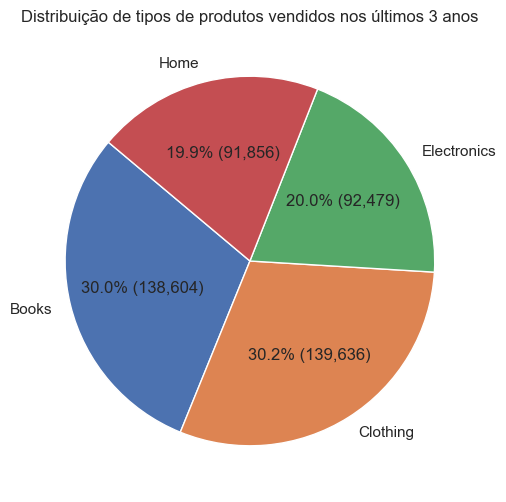

In [959]:
total_sales = produtos_vendidos.sum()
def autopct_with_amount(pct):
    return f"{pct:.1f}% ({int(pct/100 * total_sales):,})"  
plt.pie(produtos_vendidos, labels=produtos_vendidos.index, autopct=autopct_with_amount, startangle=140)
plt.title("Distribuição de tipos de produtos vendidos nos últimos 3 anos")
plt.show()

Sendo assim, é possível observar que os produtos mais vendidos seguem esta ordem, de maior para menor em vendas respectivamente, Roupas, Livros, Eletrônicos e Produtos para casa

# Qual o produto mais caro e o mais barato ?

In [960]:
df_second_answer = df.copy() #Criando uma cópia para responder a pergunta

In [961]:
#getting the most expensive 'Product Price' for each product category, the same for the cheaper them creating a df with both
most_expensive = df_second_answer.groupby('Product Category')['Product Price'].max()
cheaper = df_second_answer.groupby('Product Category')['Product Price'].min()
most_expensive = most_expensive.reset_index()
cheaper = cheaper.reset_index()
most_expensive.rename(columns={'Product Price': 'Mais caro'}, inplace=True)
cheaper.rename(columns={'Product Price': 'Mais barato'}, inplace=True)
df_second_answer = pd.merge(most_expensive, cheaper, on='Product Category')

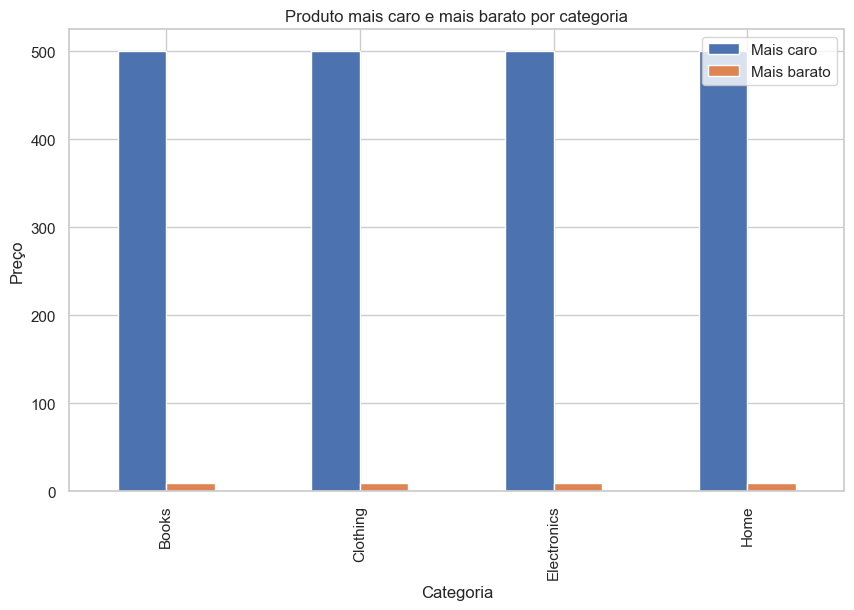

In [962]:
df_second_answer.plot(x='Product Category', kind='bar')
plt.title('Produto mais caro e mais barato por categoria')
plt.ylabel('Preço')
plt.xlabel('Categoria')
plt.show()

# Qual a categoria de produto mais vendida e a menos vendida? Qual categoria mais e menos cara?

In [963]:
df_third_answer = df.copy()
#getting the amount of sales for each product category
sales = df_third_answer.groupby('Product Category')['Quantity'].sum()
#Letting just the greatest and lower value in the sales
sales = sales.reset_index()
sales = sales.sort_values(by='Quantity')
sales = sales.reset_index(drop=True)
sales = sales.iloc[[0, -1], :]

In [964]:
sales

,Product Category,Quantity
0,Home,149698
3,Clothing,225322


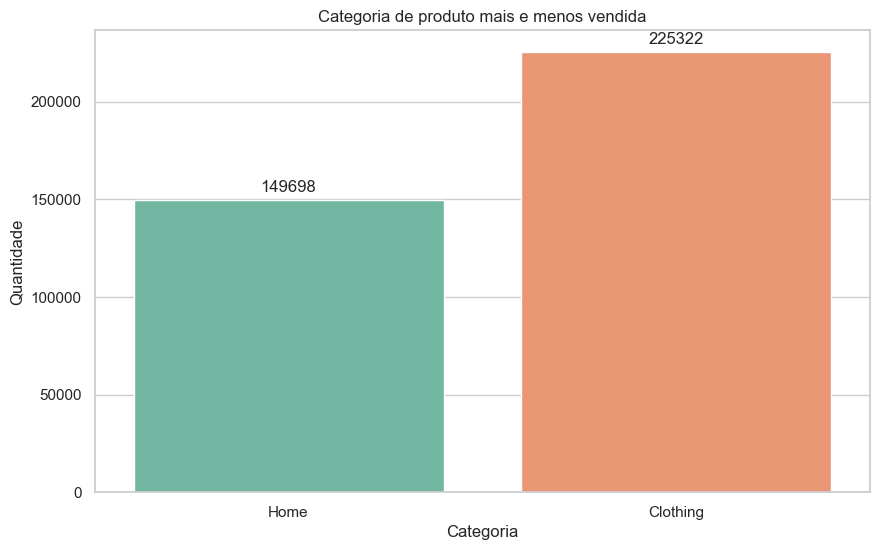

In [965]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='Product Category', y='Quantity', data=sales,palette='Set2')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    
plt.title('Categoria de produto mais e menos vendida')
plt.ylabel('Quantidade')
plt.xlabel('Categoria')
plt.show()

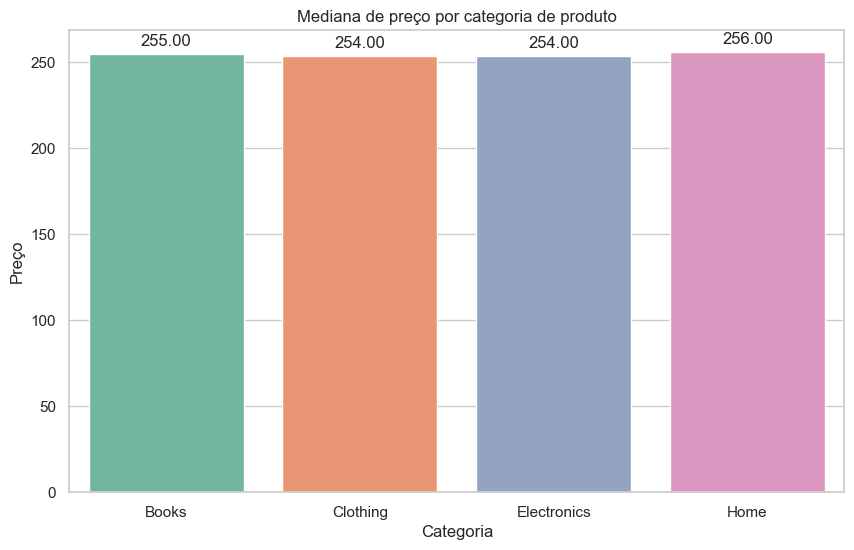

In [966]:
#Extraindo a mediana de preço de produto por cada categoria
median_prices = df_third_answer.groupby('Product Category')['Product Price'].median()

#bar plot sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

plot = sns.barplot(x=median_prices.index, y=median_prices,palette='Set2')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    
plt.title('Mediana de preço por categoria de produto')
plt.ylabel('Preço')
plt.xlabel('Categoria')
plt.show()

# Qual o produto com melhor e pior NPS?

In [967]:
df_forth_answer = df.copy()

mean_nps = df_forth_answer.groupby('Product Category')['NPS'].mean()


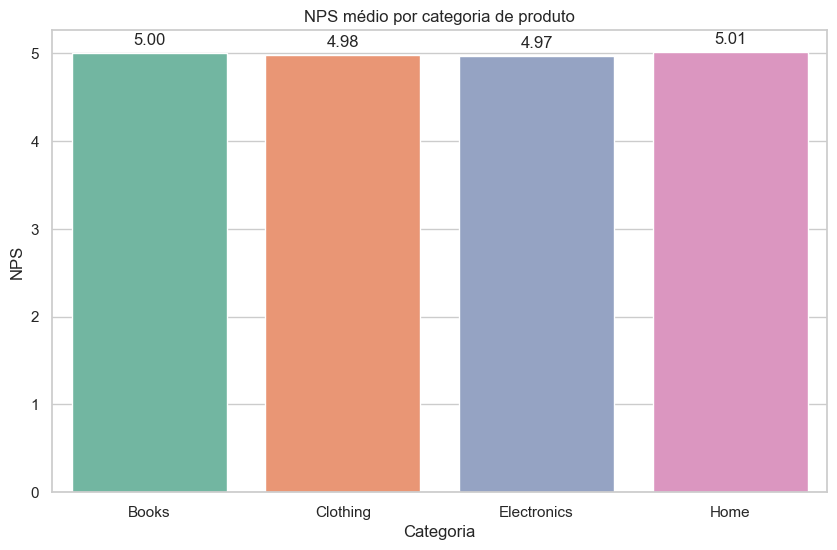

In [968]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=mean_nps.index, y=mean_nps, palette='Set2')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.title('NPS médio por categoria de produto')
plt.ylabel('NPS')
plt.xlabel('Categoria')
plt.show()

<h1> Resolução do desafio

Pensando no melhor tipo de solução possível, não se pode levar em consideração apenas os dados de gênero, idade, fonte e categoria de produto, pois o valor gasto também é um fator extremamente importante. Portanto, foram utilizadas as colunas 'Product Category', 'Customer Age', 'Gender', 'Source' e 'Total Purchase Amount' para responder ao desafio.

In [969]:
colunas_a_serem_mantidas = ['Product Category','Customer Age','Gender','Source', 'Total Purchase Amount']
df = df[colunas_a_serem_mantidas]

In [970]:
df.head()

,Product Category,Customer Age,Gender,Source,Total Purchase Amount
0,Electronics,20,Male,Instagram Campign,740
1,Home,20,Male,Instagram Campign,2739
2,Home,20,Male,SEM,3196
3,Clothing,20,Male,Instagram Campign,3509
4,Home,20,Female,Instagram Campign,3452


In [971]:
df.describe()

,Customer Age,Total Purchase Amount
count,250000.000000,250000.000000
mean,43.759228,2725.370732
std,15.392075,1442.933565
min,18.000000,100.000000
25%,30.000000,1477.000000
50%,44.000000,2724.000000
75%,57.000000,3974.000000
max,70.000000,5350.000000


In [972]:
df['Customer Age'].unique() #Idades observadas no dataset

array([20, 18, 21, 19, 24, 26, 23, 32, 29, 43, 31, 28, 34, 30, 25, 27, 52,
       45, 36, 62, 59, 44, 70, 56, 49, 50, 66, 40, 47, 51, 54, 53, 55, 46,
       37, 63, 61, 33, 22, 60, 38, 35, 48, 42, 67, 58, 69, 41, 39, 65, 68,
       57, 64], dtype=int64)

A próxima celula de código será responsável pela separação em 4 diferentes dataframes, separando cada categoria de produto individualmente

In [973]:
compradores_electronics = df[df['Product Category'] == 'Electronics'] #Filtrando os compradores de eletrônicos
compradores_electronics = compradores_electronics.drop(columns='Product Category') #Removendo a coluna 'Product Category'
compradores_electronics.reset_index(drop=True, inplace=True) #Resetando o índice

compradores_home = df[df['Product Category'] == 'Home']
compradores_home = compradores_home.drop(columns='Product Category')
compradores_home.reset_index(drop=True, inplace=True)

compradores_clothing = df[df['Product Category'] == 'Clothing']
compradores_clothing = compradores_clothing.drop(columns='Product Category') 
compradores_clothing.reset_index(drop=True, inplace=True)

compradores_books = df[df['Product Category'] == 'Books']
compradores_books = compradores_books.drop(columns='Product Category')
compradores_books.reset_index(drop=True, inplace=True)

In [974]:
#Exemplo da tabela de compradores de livros após separação
compradores_books

,Customer Age,Gender,Source,Total Purchase Amount
0,20,Female,SEM,2937
1,20,Male,FaceBook campaign,2682
2,20,Male,Instagram Campign,731
3,20,Male,Instagram Campign,2563
4,20,Male,Instagram Campign,4135
...,...,...,...,...
74907,38,Female,SEM,4086
74908,53,Male,SEM,1793
74909,45,Male,SEM,4031
74910,54,Male,Organic Search,3397


In [975]:
#esta função é responsável pela separação em faixas etárias, neste caso, de 18 até 73 anos, com intervalos de 5 anos
def separate_in_age_group(df):
    bins = list(range(18, 69, 10)) + [100]
    labels = [f"{i}-{i+9}" for i in range(18, 67, 10)] + ["68+"]
    df['age_group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels, right=False)
    df.drop(columns='Customer Age', inplace=True) #Removendo a coluna de idade, agora desnecessária


In [976]:
separate_in_age_group(compradores_electronics)
separate_in_age_group(compradores_home)
separate_in_age_group(compradores_clothing)
separate_in_age_group(compradores_books)

Embora tenhamos adicionado um grupo etário para cada um dos rows de cada categoria de produto, ainda não os agrupamos em um único conjunto. A função agrupar_age_groups será responsável por isso.

In [1001]:
#Agrupa as instancia de cada faixa etária, gênero e fonte de compra, obtendo o desvio padrão do valor total de compra
def agrupar_age_groups(df):
    #median_price_quantity = df.groupby(['age_group', 'Gender','Source'])['PriceXQuantity'].std().reset_index()
    
    std_price_quantity = df.groupby(['age_group', 'Gender','Source'])['Total Purchase Amount'].std().reset_index()
    source_counts = df.groupby(['age_group', 'Gender', 'Source']).size().reset_index(name='Source_Count')
    df = pd.merge(std_price_quantity, source_counts, on=['age_group', 'Gender','Source'])
    
    #std_price_quantity = df.groupby(['age_group','Source'])['Total Purchase Amount'].mean().reset_index()
    #source_counts = df.groupby(['age_group','Source']).size().reset_index(name='Source_Count')
    #df = pd.merge(std_price_quantity, source_counts, on=['age_group','Source'])
    
    return df

In [1002]:
compradores_electronics_gruped = agrupar_age_groups(compradores_electronics)

In [1003]:
compradores_electronics_gruped

,age_group,Gender,Source,Total Purchase Amount,Source_Count
0,18-27,Female,FaceBook campaign,1435.683081,1291
1,18-27,Female,Instagram Campign,1429.835123,1392
2,18-27,Female,Organic Search,1418.494543,923
3,18-27,Female,SEM,1424.935840,1297
4,18-27,Male,FaceBook campaign,1422.394865,1317
5,18-27,Male,Instagram Campign,1467.929182,1504
6,18-27,Male,Organic Search,1403.999814,848
7,18-27,Male,SEM,1416.718328,1349
8,28-37,Female,FaceBook campaign,1454.024347,1266
9,28-37,Female,Instagram Campign,1459.195038,1324


In [1004]:
#Eliminando do DataFrame as instâncias onde o 'Source_Count' é igual a 0, pois existem algumas faixas etárias que não realizaram compras
compradores_electronics_gruped = compradores_electronics_gruped[compradores_electronics_gruped['Source_Count'] != 0]

#### Um fator extremamente importante da minha solução é a variável "Rate". Ela é obtida através da multiplicação do desvio padrão do 'Total Purchase Amount' dos grupos (Gênero, Faixa Etária e Source) pela quantidade de compras que fazem parte do mesmo grupo.

#### O Rate serve como um indicador para mostrar o quanto aquele grupo gastou de fato com aquele determinado produto, servindo como um forte indicativo sobre qual seria o melhor grupo para vendermos determinado tipo de produto.


In [1005]:
compradores_electronics_gruped['Rate'] = compradores_electronics_gruped['Total Purchase Amount'] * compradores_electronics_gruped['Source_Count']
compradores_electronics_gruped.drop(columns=['Source_Count','Total Purchase Amount'], inplace=True)
compradores_electronics_gruped = compradores_electronics_gruped.sort_values(by='Rate', ascending=False) #Organizando o DataFrame de forma decrescente

In [1006]:
compradores_electronics_gruped

,age_group,Gender,Source,Rate
5,18-27,Male,Instagram Campign,2.207765e+06
1,18-27,Female,Instagram Campign,1.990330e+06
17,38-47,Female,Instagram Campign,1.968196e+06
33,58-67,Female,Instagram Campign,1.944519e+06
9,28-37,Female,Instagram Campign,1.931974e+06
25,48-57,Female,Instagram Campign,1.915023e+06
7,18-27,Male,SEM,1.911153e+06
23,38-47,Male,SEM,1.875627e+06
4,18-27,Male,FaceBook campaign,1.873294e+06
21,38-47,Male,Instagram Campign,1.858140e+06


In [1009]:
#save compradores_electronics_gruped to csv
compradores_electronics_gruped.to_csv('compradores_electronics_gruped.csv', index=False)

In [1010]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [1021]:
formula = 'Rate ~ age_group + Gender + Source + age_group:Gender + age_group:Source + Gender:Source'

In [1022]:
model = ols(formula, data=compradores_electronics_gruped).fit()

In [1023]:
anova_table = sm.stats.anova_lm(model, typ=2)

In [1014]:
print(anova_table)

                        sum_sq    df           F        PR(>F)
age_group         9.137495e+12   5.0  466.101828  6.747648e-16
Gender            1.300364e+09   1.0    0.331657  5.732249e-01
Source            2.683166e+12   3.0  228.112943  9.821083e-13
age_group:Gender  1.356520e+10   5.0    0.691958  6.373398e-01
age_group:Source  2.880624e+11  15.0    4.898003  1.935769e-03
Gender:Source     3.987560e+09   3.0    0.339008  7.974363e-01
Residual          5.881222e+10  15.0         NaN           NaN


The ANOVA table provides the following key insights:

age_group: The F-value is 466.10 with a p-value of 
6.75×10^−16. This indicates a significant effect of "age_group" on the "Rate".

Gender: The F-value is 0.33 with a p-value of 0.573. This indicates that "Gender" does not have a significant effect on the "Rate".
Source: The F-value is 228.11 with a p-value of 
9.82×10^−13. This indicates a significant effect of "Source" on the "Rate".

age_group: The interaction between "age_group" and "Gender" has an F-value of 0.69 with a p-value of 0.637, indicating no significant interaction effect.
age_group: The interaction between "age_group" and "Source" has an F-value of 4.90 with a p-value of 0.0019, indicating a significant interaction effect.
Gender: The interaction between "Gender" and "Source" has an F-value of 0.34 with a p-value of 0.797, indicating no si

In [983]:
#Aqui, estou utoizando o MinMaxScaler da biblioteca sklearn para normalizar os valores da coluna 'Rate'
#Neste caso, os valores de Rate irão de 0 a 1, onde 1 é o indicativo do melhor grupo para vender e 0 o pior grupo comparado a todos os outros
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
compradores_electronics_gruped[['Rate']] = scaler.fit_transform(compradores_electronics_gruped[['Rate']])
compradores_electronics_gruped = compradores_electronics_gruped.sort_values(by='Rate', ascending=False) #Organizando o DataFrame de forma decrescente

In [992]:
compradores_electronics_gruped
#saving compradores_electronics_gruped to csv

,age_group,Source,Rate
1,18-27,Instagram Campign,1.000000
17,58-67,Instagram Campign,0.980173
13,48-57,Instagram Campign,0.937164
9,38-47,Instagram Campign,0.932061
16,58-67,FaceBook campaign,0.925085
11,38-47,SEM,0.888806
5,28-37,Instagram Campign,0.885832
12,48-57,FaceBook campaign,0.884936
15,48-57,SEM,0.877453
8,38-47,FaceBook campaign,0.871872


In [984]:
compradores_electronics_gruped

,age_group,Source,Rate
1,18-27,Instagram Campign,1.000000
17,58-67,Instagram Campign,0.980173
13,48-57,Instagram Campign,0.937164
9,38-47,Instagram Campign,0.932061
16,58-67,FaceBook campaign,0.925085
11,38-47,SEM,0.888806
5,28-37,Instagram Campign,0.885832
12,48-57,FaceBook campaign,0.884936
15,48-57,SEM,0.877453
8,38-47,FaceBook campaign,0.871872


In [985]:
df

,Product Category,Customer Age,Gender,Source,Total Purchase Amount
0,Electronics,20,Male,Instagram Campign,740
1,Home,20,Male,Instagram Campign,2739
2,Home,20,Male,SEM,3196
3,Clothing,20,Male,Instagram Campign,3509
4,Home,20,Female,Instagram Campign,3452
...,...,...,...,...,...
249995,Clothing,55,Male,SEM,2187
249996,Home,42,Female,Instagram Campign,3615
249997,Home,41,Male,Instagram Campign,2466
249998,Books,34,Female,Instagram Campign,3668
